
Crystal properties

                    CIF file:  /home/spc93/spc_cifs/TBB_1578620.cif
                     Lattice:  4.017 10.692 10.261 90.00 100.17 90.00
                   All sites:  Br1, Br2, C1, C2, C3, H3
               Site selected:  Br1
                 Site vector:  0.615 0.793 0.589
       No. of spacegroup ops:  4
      No. of sym ops at site:  1
 No. of equiv. sites in cell:  4
   No. of pg ops for crystal:  4

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 0.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


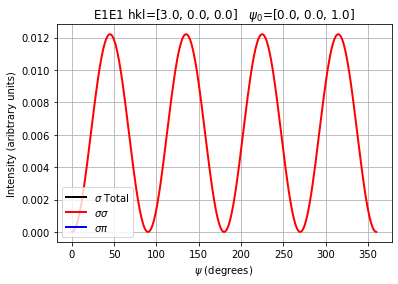


Tensor components

         Crystal (spherical):  [ 1.   +0.j  0.018-0.j  0.709-0.j -0.018-0.j  1.   -0.j]
            Atom (spherical):  [1.   +0.j    0.044+0.042j 0.509-0.319j 0.018+0.058j 0.435-0.901j]
  Struct. factor (spherical):  [ 1.  -0.j  0.11-0.j  0.  +0.j  0.11+0.j -1.  +0.j]
      Scattering phase (rad):  3.14

Crystal (Cartesian):

[[ 1.65 +0.j -0.   +0.j  0.042+0.j]
 [-0.   +0.j -2.995+0.j  0.   +0.j]
 [ 0.042+0.j  0.   +0.j  1.344+0.j]]

Atom (Cartesian):

[[ 0.413+0.j -0.364+0.j  0.01 +0.j]
 [-0.364+0.j -0.749+0.j -0.04 +0.j]
 [ 0.01 +0.j -0.04 +0.j  0.336+0.j]]

Struct. factor (Cartesian):

[[ 0.  -0.j  1.  -0.j -0.  -0.j]
 [ 1.  -0.j -0.  +0.j  0.11-0.j]
 [-0.  -0.j  0.11-0.j  0.  +0.j]]

[[ 4.017  0.    -1.813]
 [ 0.    10.692  0.   ]
 [ 0.     0.    10.1  ]]


In [88]:
import TensorScatteringClass as ten
import numpy as np
%matplotlib inline

t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/TBB_1578620.cif', Site='Br1');
#t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/TBB_1578620.cif', Site='Br2');

#t.B=t.latt2b(t.lattice)
#t.B=t.latt2b(t.lattice, direct=True, BLstyle=False)
t.B=t.latt2b(t.lattice, direct=True, BLstyle=True)


t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/13.5, hkl=np.array([3,0,0]), hkln=np.array([0,0,1]), K=2, Time=1, Parity=1, mk=None, sk=None, sigmapi='sigma')
# this one exists

t.print_tensors()
print(t.B)



In [57]:
t.equiv_sites(t.sglist, t.sitevec)
# OK: origin choice 2 (choice 1 is 0,0,0)

[array([0.615, 0.793, 0.589]),
 array([0.885, 0.293, 0.911]),
 array([0.385, 0.207, 0.411]),
 array([0.115, 0.707, 0.089])]

In [138]:
from numpy import linalg
'''
        follow Busing&Levy, D.E.Sands
        direct=False: normal recip space B matrix (B&L)
        direct=True, BLstyle=True: Busing & Levy style applied to real space (i.e. x||a)
        direct=True, BLstyle=False: Real space B matrix compatible with recip space B matrix
'''

print(t.lattice)
print('\nB+L B matrix:\n', t.latt2b(t.lattice, direct=False, BLstyle=False))
print('\nReal space B matrix consistent with BL:\n', t.latt2b(t.lattice, direct=True, BLstyle=False))
print('\nB+L style real space B matrix:\n', t.latt2b(t.lattice, direct=True, BLstyle=True))

B1 = t.latt2b(t.lattice, direct=True, BLstyle=False)
B2 = t.latt2b(t.lattice, direct=True, BLstyle=True)

# B1 and B2 are not unitarily equivalent but B2 = U B1
# check that U = B2 B1* is unitary
U = B2.dot(linalg.inv(B1))
print(linalg.det(U))
print('\n', B2, '\n\n', U.dot(B1))
# OK this all looks fine


[4.0172, 10.6917, 10.2615, 90.0, 100.175, 90.0]

B+L B matrix:
 [[ 0.253 -0.     0.017]
 [ 0.     0.094 -0.   ]
 [ 0.     0.     0.097]]

Real space B matrix consistent with BL:
 [[ 3.954  0.     0.   ]
 [ 0.    10.692  0.   ]
 [-0.71   0.    10.261]]

B+L style real space B matrix:
 [[ 4.017  0.    -1.813]
 [ 0.    10.692  0.   ]
 [ 0.     0.    10.1  ]]
1.0000000000000004

 [[ 4.017  0.    -1.813]
 [ 0.    10.692  0.   ]
 [ 0.     0.    10.1  ]] 

 [[ 4.017  0.    -1.813]
 [ 0.    10.692  0.   ]
 [ 0.    -0.    10.1  ]]


In [137]:
np.arcsin(.146)*180/np.pi

8.395191256670724